In [27]:
!pip install pycaret-ts-alpha

You should consider upgrading via the 'C:\Users\User\AppData\Roaming\JetBrains\DataSpell2021.3\projects\workspace\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment
from sktime.utils.plotting import plot_series

In [29]:
data0=pd.read_csv('euro-daily-hist_1999_2021.csv')
data0.head()

,Period\Unit:,[Argentine peso ],[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],...,[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[New Taiwan dollar ],[US dollar ],[South African rand ]
0,2021-09-20,NaN,1.6201,1.9558,6.2495,1.5056,1.0883,7.5726,NaN,25.432,...,86.0700,10.2173,1.5839,NaN,NaN,39.0620,10.1512,NaN,1.1711,17.3301
1,2021-09-17,NaN,1.6111,1.9558,6.2039,1.4913,1.0931,7.6044,NaN,25.296,...,85.4338,10.1553,1.5851,NaN,NaN,39.1450,10.1323,NaN,1.1780,17.1891
2,2021-09-16,NaN,1.6077,1.9558,6.1611,1.4863,1.0886,7.5849,NaN,25.281,...,85.2347,10.1518,1.5805,NaN,NaN,38.9180,9.9663,NaN,1.1763,17.0544
3,2021-09-15,NaN,1.6153,1.9558,6.1979,1.5004,1.0845,7.6069,NaN,25.318,...,85.9738,10.1360,1.5860,NaN,NaN,38.8650,9.9769,NaN,1.1824,16.8973
4,2021-09-14,NaN,1.6114,1.9558,6.1788,1.4951,1.0887,7.6168,NaN,25.389,...,86.1062,10.1453,1.5870,NaN,NaN,38.9270,9.9848,NaN,1.1814,16.8097


In [30]:
data1=data0[['Period\\Unit:','[US dollar ]']]
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5878 entries, 0 to 5877
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Period\Unit:  5878 non-null   object
 1   [US dollar ]  5878 non-null   object
dtypes: object(2)
memory usage: 92.0+ KB


In [31]:
data1.columns=['Date','EUR/USD']

In [32]:
drop=[]
EURO=[]
for i,item in enumerate(data1['EUR/USD']):
    if item=='-':
        drop+=[i]
    else:
        EURO+=[float(item)]

In [33]:
data1=data1.drop(index=drop)
data1['EUR/USD']=EURO
data1

,Date,EUR/USD
0,2021-09-20,1.1711
1,2021-09-17,1.1780
2,2021-09-16,1.1763
3,2021-09-15,1.1824
4,2021-09-14,1.1814
...,...,...
5873,1999-01-08,1.1659
5874,1999-01-07,1.1632
5875,1999-01-06,1.1743
5876,1999-01-05,1.1790


In [34]:
data1.index = pd.DatetimeIndex(data1["Date"])
data1.drop(["Date"],axis=1,inplace=True)
data1

,EUR/USD
Date,
2021-09-20,1.1711
2021-09-17,1.1780
2021-09-16,1.1763
2021-09-15,1.1824
2021-09-14,1.1814
...,...
1999-01-08,1.1659
1999-01-07,1.1632
1999-01-06,1.1743


In [35]:
data1 = data1.asfreq('d')
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8296 entries, 1999-01-04 to 2021-09-20
Freq: D
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EUR/USD  5816 non-null   float64
dtypes: float64(1)
memory usage: 129.6 KB


In [36]:
data2=data1.fillna(method='ffill')
data2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8296 entries, 1999-01-04 to 2021-09-20
Freq: D
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EUR/USD  8296 non-null   float64
dtypes: float64(1)
memory usage: 129.6 KB


In [37]:
data=data2['EUR/USD']
print(type(data))
data

<class 'pandas.core.series.Series'>


Date
1999-01-04    1.1789
1999-01-05    1.1790
1999-01-06    1.1743
1999-01-07    1.1632
1999-01-08    1.1659
               ...  
2021-09-16    1.1763
2021-09-17    1.1780
2021-09-18    1.1780
2021-09-19    1.1780
2021-09-20    1.1711
Freq: D, Name: EUR/USD, Length: 8296, dtype: float64

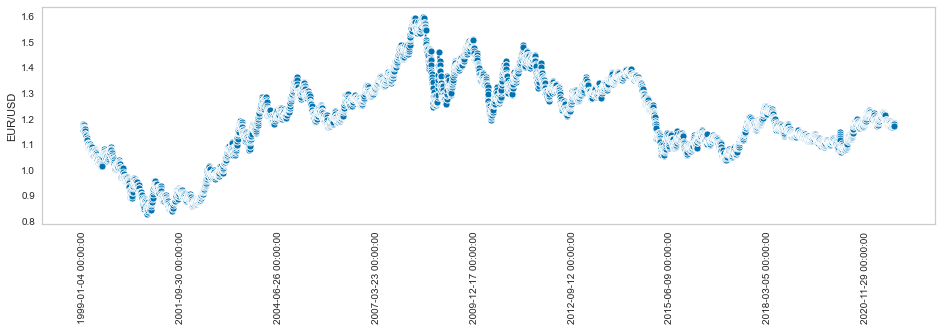

In [38]:
_ =plot_series(data)
plt.xticks(rotation=90)
plt.grid()

In [39]:
exp = TimeSeriesExperiment()
exp.setup(data=data,session_id=42,fh=30)

,Description,Value
0,session_id,42
1,Original Data,"(8296, 1)"
2,Missing Values,False
3,Transformed Train Set,"(8266,)"
4,Transformed Test Set,"(30,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,Enforce Prediction Interval,False
8,Seasonal Period Tested,7
9,Seasonality Detected,True


In [40]:
model = exp.create_model('arima')
model

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,R2
0,2021-05-23,0.0132,0.0173,0.0110,0.0109,1.0866,-1.4032
1,2021-06-22,0.0085,0.0099,0.0072,0.0072,0.7026,-2.1626
2,2021-07-22,0.0056,0.0071,0.0047,0.0047,0.4627,-0.2121
Mean,NaT,0.0091,0.0114,0.0076,0.0076,0.7507,-1.2593
SD,NaT,0.0031,0.0043,0.0026,0.0025,0.2570,0.8027


ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 1, 0, 7),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [41]:
y_train = exp.get_config('y_train')
y_train.index

PeriodIndex(['1999-01-04', '1999-01-05', '1999-01-06', '1999-01-07',
             '1999-01-08', '1999-01-09', '1999-01-10', '1999-01-11',
             '1999-01-12', '1999-01-13',
             ...
             '2021-08-12', '2021-08-13', '2021-08-14', '2021-08-15',
             '2021-08-16', '2021-08-17', '2021-08-18', '2021-08-19',
             '2021-08-20', '2021-08-21'],
            dtype='period[D]', length=8266)

In [42]:
y_predict = exp.predict_model(model)
y_predict

,Model,MAE,RMSE,MAPE,SMAPE,MASE,R2
0,ARIMA,0.0146,0.0159,0.0123,0.0124,1.2055,-8.2145


2021-08-22    1.1685
2021-08-23    1.1703
2021-08-24    1.1708
2021-08-25    1.1673
2021-08-26    1.1653
2021-08-27    1.1634
2021-08-28    1.1640
2021-08-29    1.1658
2021-08-30    1.1680
2021-08-31    1.1689
2021-09-01    1.1656
2021-09-02    1.1639
2021-09-03    1.1622
2021-09-04    1.1629
2021-09-05    1.1649
2021-09-06    1.1673
2021-09-07    1.1682
2021-09-08    1.1651
2021-09-09    1.1634
2021-09-10    1.1618
2021-09-11    1.1626
2021-09-12    1.1646
2021-09-13    1.1670
2021-09-14    1.1680
2021-09-15    1.1649
2021-09-16    1.1632
2021-09-17    1.1617
2021-09-18    1.1624
2021-09-19    1.1645
2021-09-20    1.1669
Freq: D, Name: EUR/USD, dtype: float64

In [43]:
data = data.to_period('d')

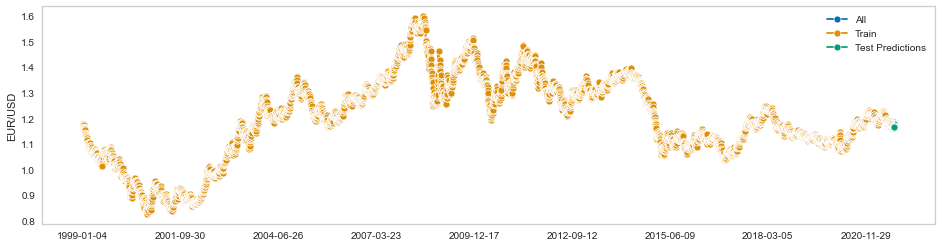

In [44]:
plot_series(data, y_train, y_predict, labels=['All', 'Train', 'Test Predictions'])
plt.grid()

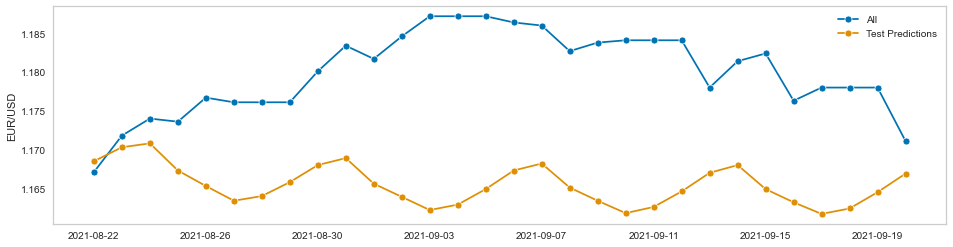

In [45]:
plot_series(data[-30:], y_predict, labels=['All', 'Test Predictions'])
plt.grid()

In [52]:
#SMAPE
tuned_model = exp.tune_model(model,optimize = 'R2')
tuned_model

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,R2
0,2021-05-23,0.0092,0.0136,0.0077,0.0076,0.7572,-0.5021
1,2021-06-22,0.0060,0.0069,0.0051,0.0051,0.4989,-0.5355
2,2021-07-22,0.0052,0.0066,0.0044,0.0044,0.4318,-0.0538
Mean,NaT,0.0068,0.0091,0.0057,0.0057,0.5626,-0.3638
SD,NaT,0.0017,0.0032,0.0014,0.0014,0.1403,0.2196


ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(1, 0, 0, 7),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [47]:
exp.predict_model(tuned_model)

,Model,MAE,RMSE,MAPE,SMAPE,MASE,R2
0,ARIMA,0.0129,0.0140,0.0109,0.0110,1.0710,-6.0982


2021-08-22    1.1671
2021-08-23    1.1671
2021-08-24    1.1671
2021-08-25    1.1670
2021-08-26    1.1670
2021-08-27    1.1670
2021-08-28    1.1670
2021-08-29    1.1670
2021-08-30    1.1670
2021-08-31    1.1670
2021-09-01    1.1670
2021-09-02    1.1670
2021-09-03    1.1670
2021-09-04    1.1670
2021-09-05    1.1670
2021-09-06    1.1670
2021-09-07    1.1670
2021-09-08    1.1670
2021-09-09    1.1670
2021-09-10    1.1670
2021-09-11    1.1670
2021-09-12    1.1670
2021-09-13    1.1670
2021-09-14    1.1669
2021-09-15    1.1669
2021-09-16    1.1669
2021-09-17    1.1669
2021-09-18    1.1669
2021-09-19    1.1669
2021-09-20    1.1669
Freq: D, Name: EUR/USD, dtype: float64

In [48]:

final_model = exp.finalize_model(tuned_model)
final_model

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(1, 0, 0, 7),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [49]:
y_pred_future = exp.predict_model(final_model, verbose=False)
y_pred_future

2021-09-21    1.1711
2021-09-22    1.1712
2021-09-23    1.1711
2021-09-24    1.1711
2021-09-25    1.1711
2021-09-26    1.1711
2021-09-27    1.1710
2021-09-28    1.1710
2021-09-29    1.1710
2021-09-30    1.1710
2021-10-01    1.1710
2021-10-02    1.1710
2021-10-03    1.1710
2021-10-04    1.1710
2021-10-05    1.1710
2021-10-06    1.1710
2021-10-07    1.1710
2021-10-08    1.1710
2021-10-09    1.1710
2021-10-10    1.1710
2021-10-11    1.1710
2021-10-12    1.1710
2021-10-13    1.1710
2021-10-14    1.1710
2021-10-15    1.1710
2021-10-16    1.1710
2021-10-17    1.1710
2021-10-18    1.1710
2021-10-19    1.1710
2021-10-20    1.1710
Freq: D, Name: EUR/USD, dtype: float64

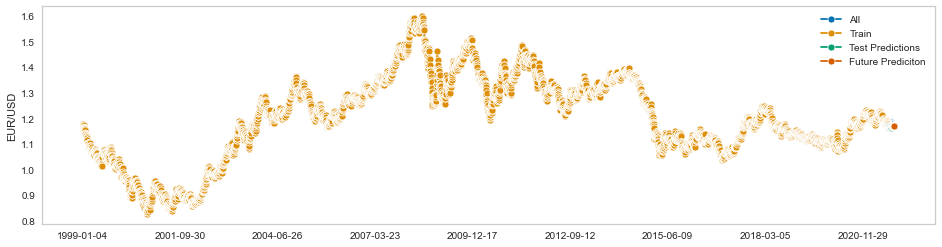

In [50]:

_=plot_series(data, y_train, y_predict, y_pred_future, labels=['All','Train','Test Predictions','Future Prediciton'])
plt.grid()

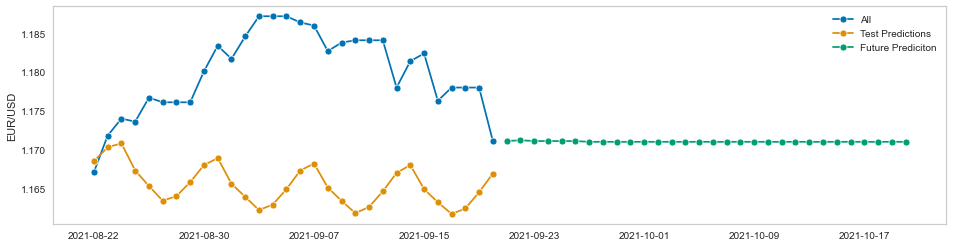

In [51]:
_=plot_series(data[-30:], y_predict, y_pred_future, labels=['All','Test Predictions','Future Prediciton'])
plt.grid()